In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Importing the dataset for training the models.
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")

In [5]:
google_training_complete

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028
...,...,...,...,...,...,...,...
3267,2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000
3268,2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300
3269,2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200
3270,2022-12-29,86.620003,88.849998,86.610001,88.449997,88.449997,23333500


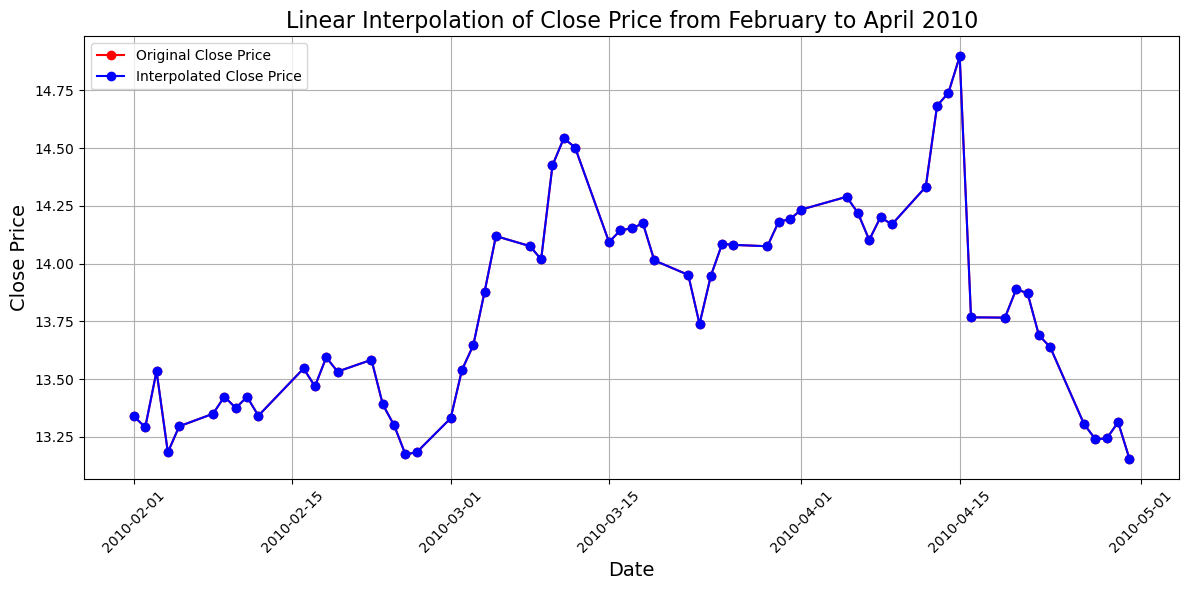

In [3]:
# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")

# Convert 'Date' to datetime
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for 2010
google_training_complete_2010 = google_training_complete[google_training_complete['Date'].dt.year == 2010]

# Filter for months 2 (February) to 4 (April)
google_training_complete_feb_apr = google_training_complete_2010[
    (google_training_complete_2010['Date'].dt.month >= 2) &
    (google_training_complete_2010['Date'].dt.month <= 4)
].copy()

# Store the original close prices for error calculation
original_close_prices = google_training_complete_feb_apr['Close'].copy()

# Find indices of non-null values
valid_indices = original_close_prices.notna() 
# This line generates a array indicating taht each  entries in original_close_prices are not null (i.e., have valid data)

# Prepare arrays for plotting
dates = google_training_complete_feb_apr['Date']
x_valid = np.arange(len(dates))[valid_indices]
y_valid = original_close_prices[valid_indices].values  # Get the values as a NumPy array

# Interpolate missing values
y_interpolated = np.copy(original_close_prices)

for i in range(len(y_valid) - 1):
    x0 = x_valid[i]
    y0 = y_valid[i]
    x1 = x_valid[i + 1]
    y1 = y_valid[i + 1]

    # Calculate slope (m)
    m = (y1 - y0) / (x1 - x0)

    # Fill in the values in between
    for x in range(x0 + 1, x1):
        y_interpolated[x] = y0 + m * (x - x0)

# Plotting
plt.figure(figsize=(12, 6))

# Plot original close prices only where they are not NaN
plt.plot(dates[original_close_prices.notna()], 
         original_close_prices.dropna(), 
         marker='o', label='Original Close Price', color='red')

# Plot interpolated close prices
plt.plot(dates, 
         y_interpolated, 
         marker='o', label='Interpolated Close Price', color='blue')

plt.title('Linear Interpolation of Close Price from February to April 2010', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# Show plot
plt.show()

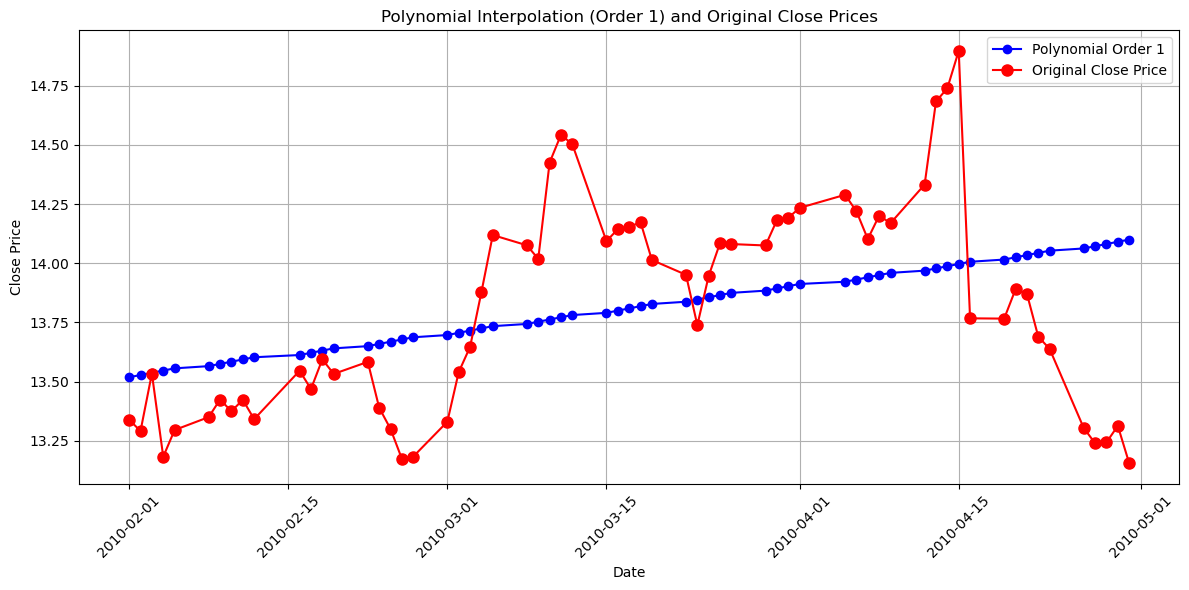

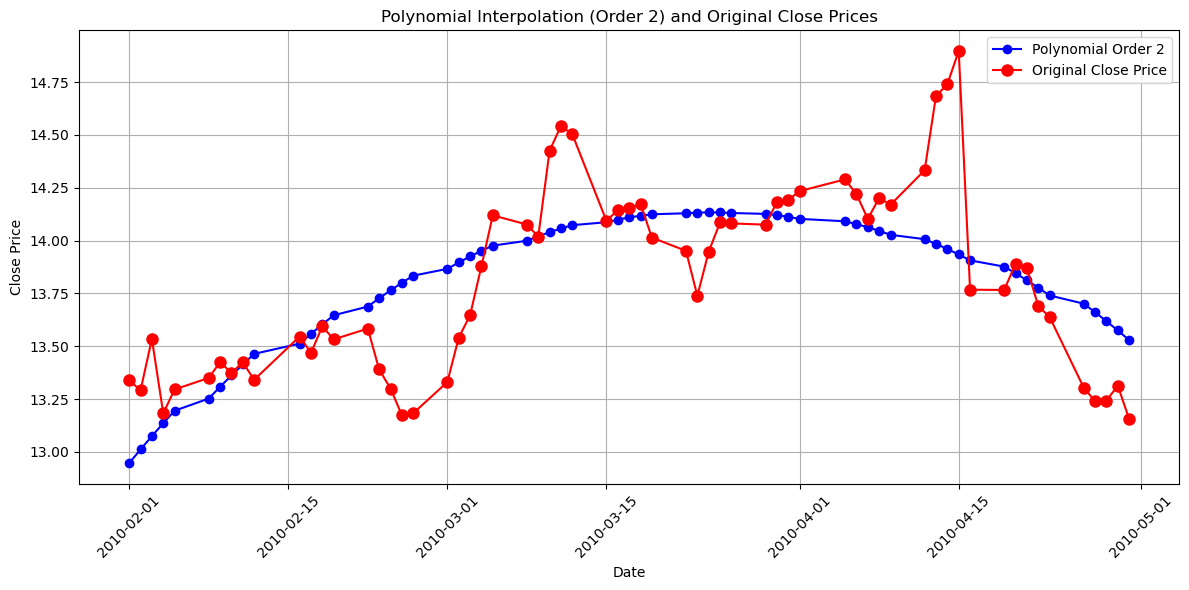

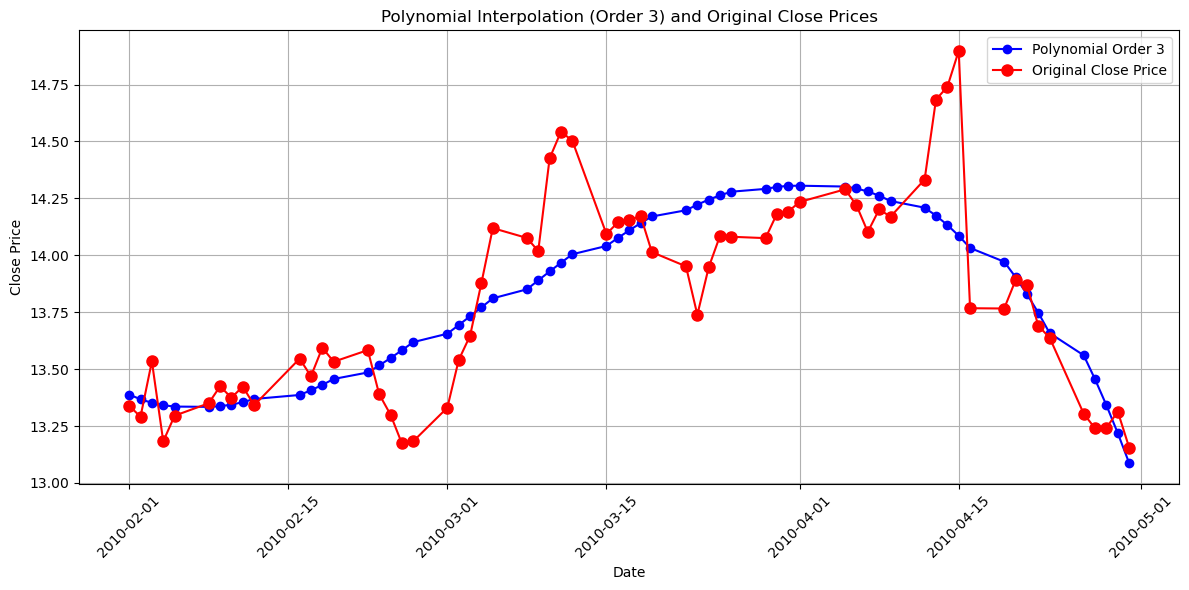

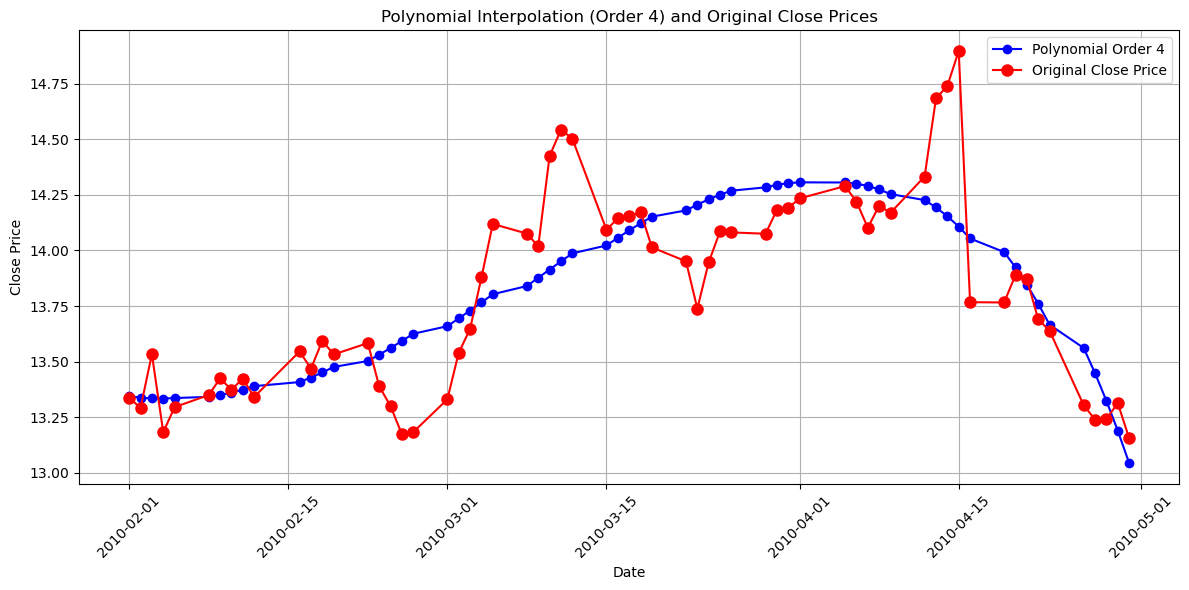

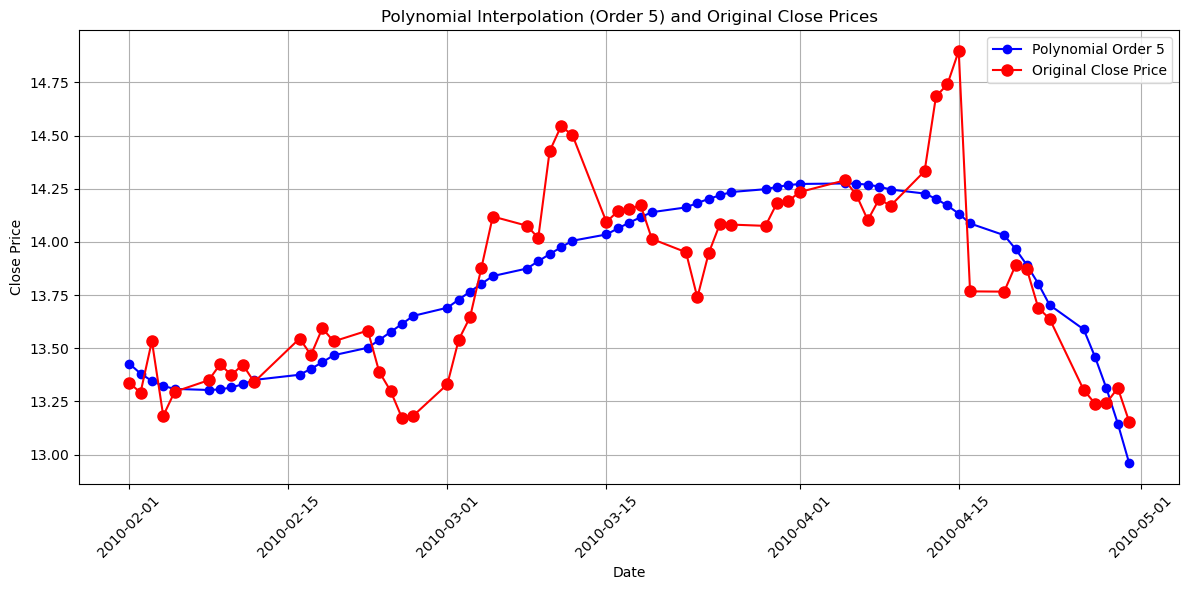

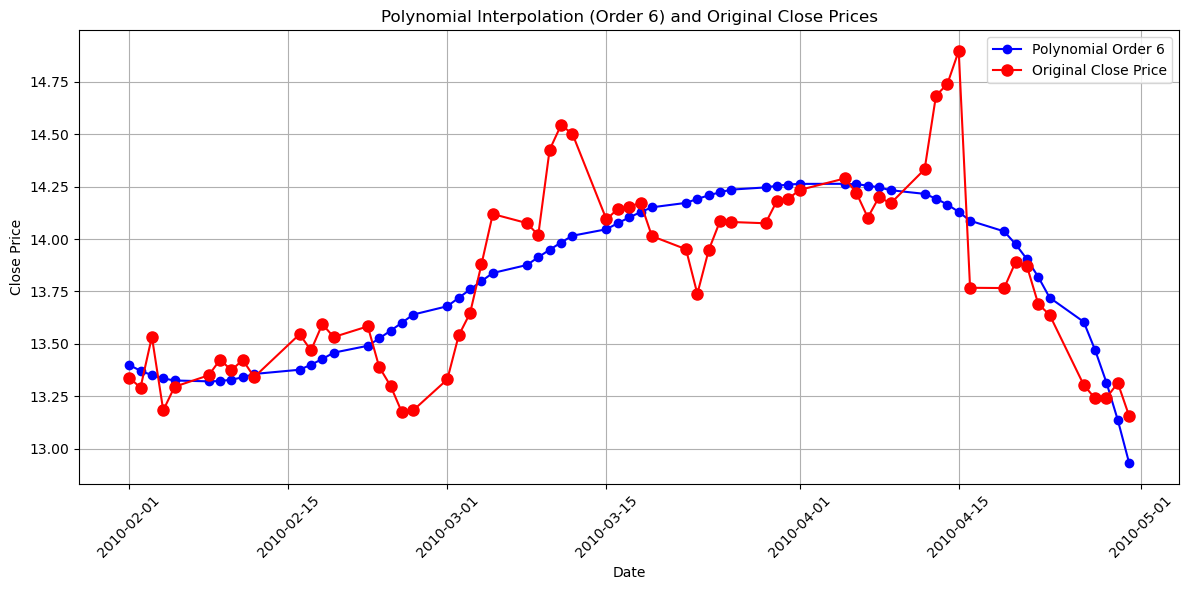

Mean Error for Polynomial Order 1: 0.33
Mean Error for Polynomial Order 2: 0.22
Mean Error for Polynomial Order 3: 0.18
Mean Error for Polynomial Order 4: 0.18
Mean Error for Polynomial Order 5: 0.18
Mean Error for Polynomial Order 6: 0.18


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")

# Convert 'Date' to datetime
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for 2010
google_training_complete_2010 = google_training_complete[google_training_complete['Date'].dt.year == 2010]

# Filter for months 2 (February) to 4 (April)
google_training_complete_feb_apr = google_training_complete_2010[
    (google_training_complete_2010['Date'].dt.month >= 2) &
    (google_training_complete_2010['Date'].dt.month <= 4)
]

# Store the original close prices for plotting
original_close_prices = google_training_complete_feb_apr['Close'].copy()

# Create numerical indices for the dates
x = np.arange(len(google_training_complete_feb_apr['Date']))
y = original_close_prices

# Use only valid data points for interpolation
valid_indices = np.where(~np.isnan(y))[0]
x_valid = x[valid_indices]
y_valid = y.dropna().values

""" 
1) np.isnan(y):
This function checks each element in the array y to determine if it is NaN (Not a Number). 
It returns a boolean array of the same shape as y, where each position contains True if the corresponding value in y is NaN, and False otherwise

2)~ (Bitwise NOT Operator):

The ~ operator negates the boolean array produced by np.isnan(y)

3) np.where(...):

np.where(condition) returns the indices of elements in the array that satisfy the given condition
""" 

# Store errors for each polynomial order
errors = []

# Loop through orders from 2 to 6 for Polynomial Interpolation
for order in range(1, 7):
    # Polynomial interpolation using numpy's polyfit and poly1d
    coeffs = np.polyfit(x_valid, y_valid, order)
    polynomial = np.poly1d(coeffs)  ### have to create a plynomila based on the coeff provided.
    polynomial_interpolated = polynomial(x)

    # Calculate error
    error = np.abs(original_close_prices.dropna().values - polynomial_interpolated[valid_indices])
    errors.append(error.mean())  # Store mean error for comparison

    # Set up individual plot for this order
    plt.figure(figsize=(12, 6))
    plt.plot(google_training_complete_feb_apr['Date'], 
             polynomial_interpolated, 
             label=f'Polynomial Order {order}', color='blue', linestyle='-', marker='o')
    
    # Plot original close prices
    plt.plot(google_training_complete_feb_apr['Date'][original_close_prices.notna()], 
             original_close_prices.dropna(), 
             marker='o', label='Original Close Price', color='red', markersize=8)

    # Title and labels
    plt.title(f'Polynomial Interpolation (Order {order}) and Original Close Prices')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Print out the errors
for order, error in zip(range(1, 7), errors):
    print(f'Mean Error for Polynomial Order {order}: {error:.2f}')


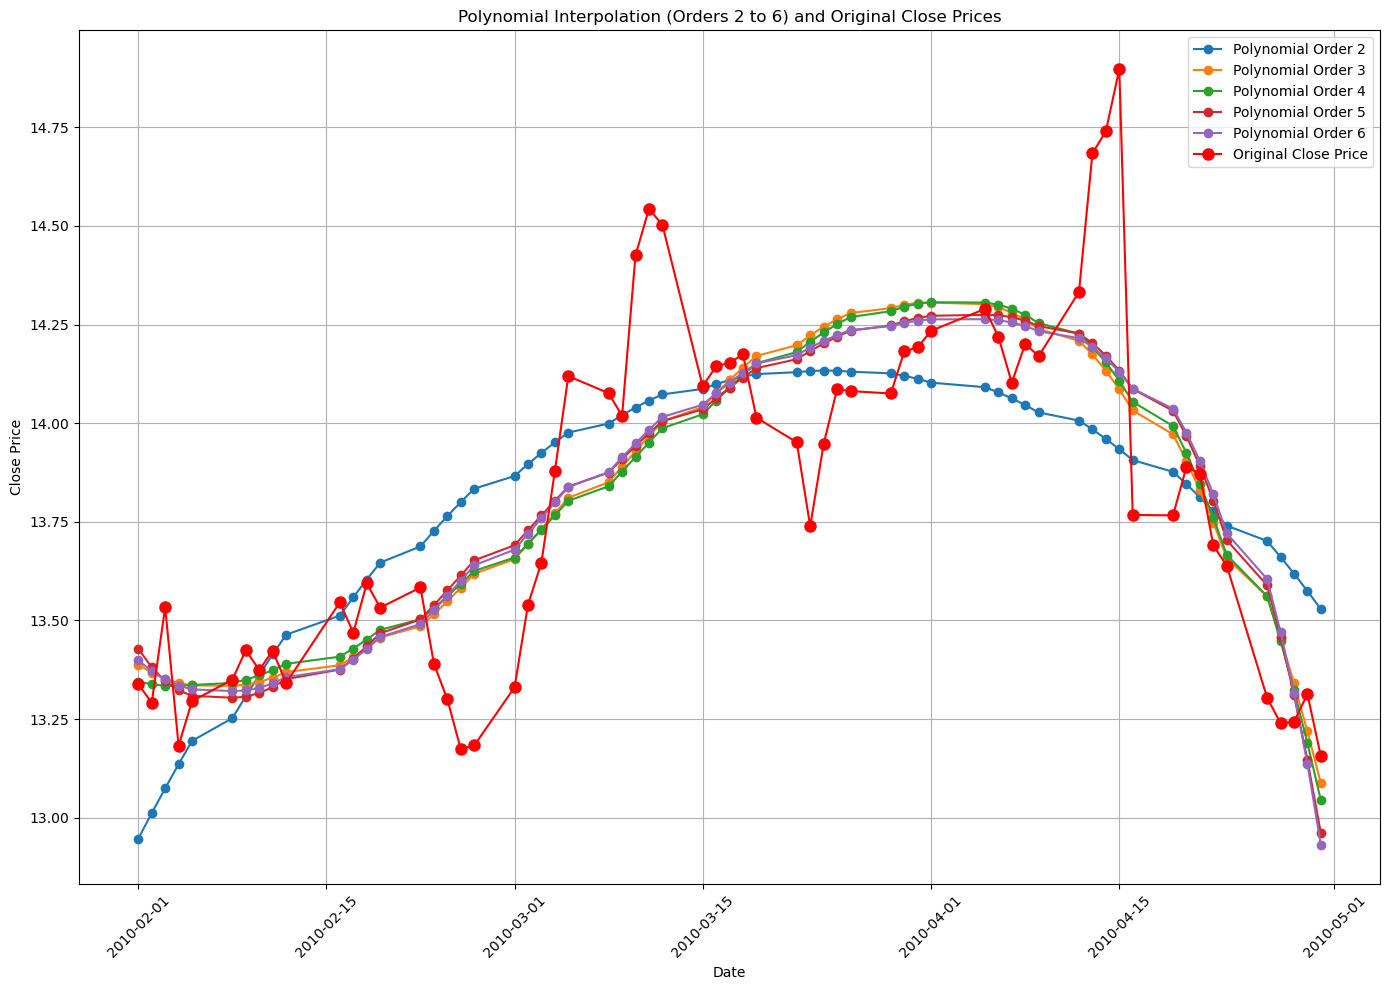

Mean Error for Polynomial Order 2: 0.22
Mean Error for Polynomial Order 3: 0.18
Mean Error for Polynomial Order 4: 0.18
Mean Error for Polynomial Order 5: 0.18
Mean Error for Polynomial Order 6: 0.18


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")

# Convert 'Date' to datetime
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for 2010
google_training_complete_2010 = google_training_complete[google_training_complete['Date'].dt.year == 2010]

# Filter for months 2 (February) to 4 (April)
google_training_complete_feb_apr = google_training_complete_2010[
    (google_training_complete_2010['Date'].dt.month >= 2) &
    (google_training_complete_2010['Date'].dt.month <= 4)
]

# Store the original close prices for plotting
original_close_prices = google_training_complete_feb_apr['Close'].copy()

# Create numerical indices for the dates
x = np.arange(len(google_training_complete_feb_apr['Date']))
y = original_close_prices

# Use only valid data points for interpolation
valid_indices = np.where(~np.isnan(y))[0]
x_valid = x[valid_indices]
y_valid = y.dropna().values

# Set up the plot
plt.figure(figsize=(14, 10))

# Loop through orders from 2 to 6 for Polynomial Interpolation
errors = []

for order in range(2, 7):
    # Polynomial interpolation using numpy's polyfit and poly1d
    coeffs = np.polyfit(x_valid, y_valid, order)
    polynomial = np.poly1d(coeffs)
    polynomial_interpolated = polynomial(x)
    
    # Calculate error
    error = np.abs(original_close_prices.dropna().values - polynomial_interpolated[valid_indices])
    errors.append(error.mean())  # Store mean error for comparison
    
    # Plot the polynomial interpolation
    plt.plot(google_training_complete_feb_apr['Date'], 
             polynomial_interpolated, 
             label=f'Polynomial Order {order}', linestyle='-', marker='o')

# Plot original close prices
plt.plot(google_training_complete_feb_apr['Date'][original_close_prices.notna()], 
         original_close_prices.dropna(), 
         marker='o', label='Original Close Price', color='red', markersize=8)

# Title and labels
plt.title('Polynomial Interpolation (Orders 2 to 6) and Original Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# Print out the errors
for order, error in zip(range(2, 7), errors):
    print(f'Mean Error for Polynomial Order {order}: {error:.2f}')


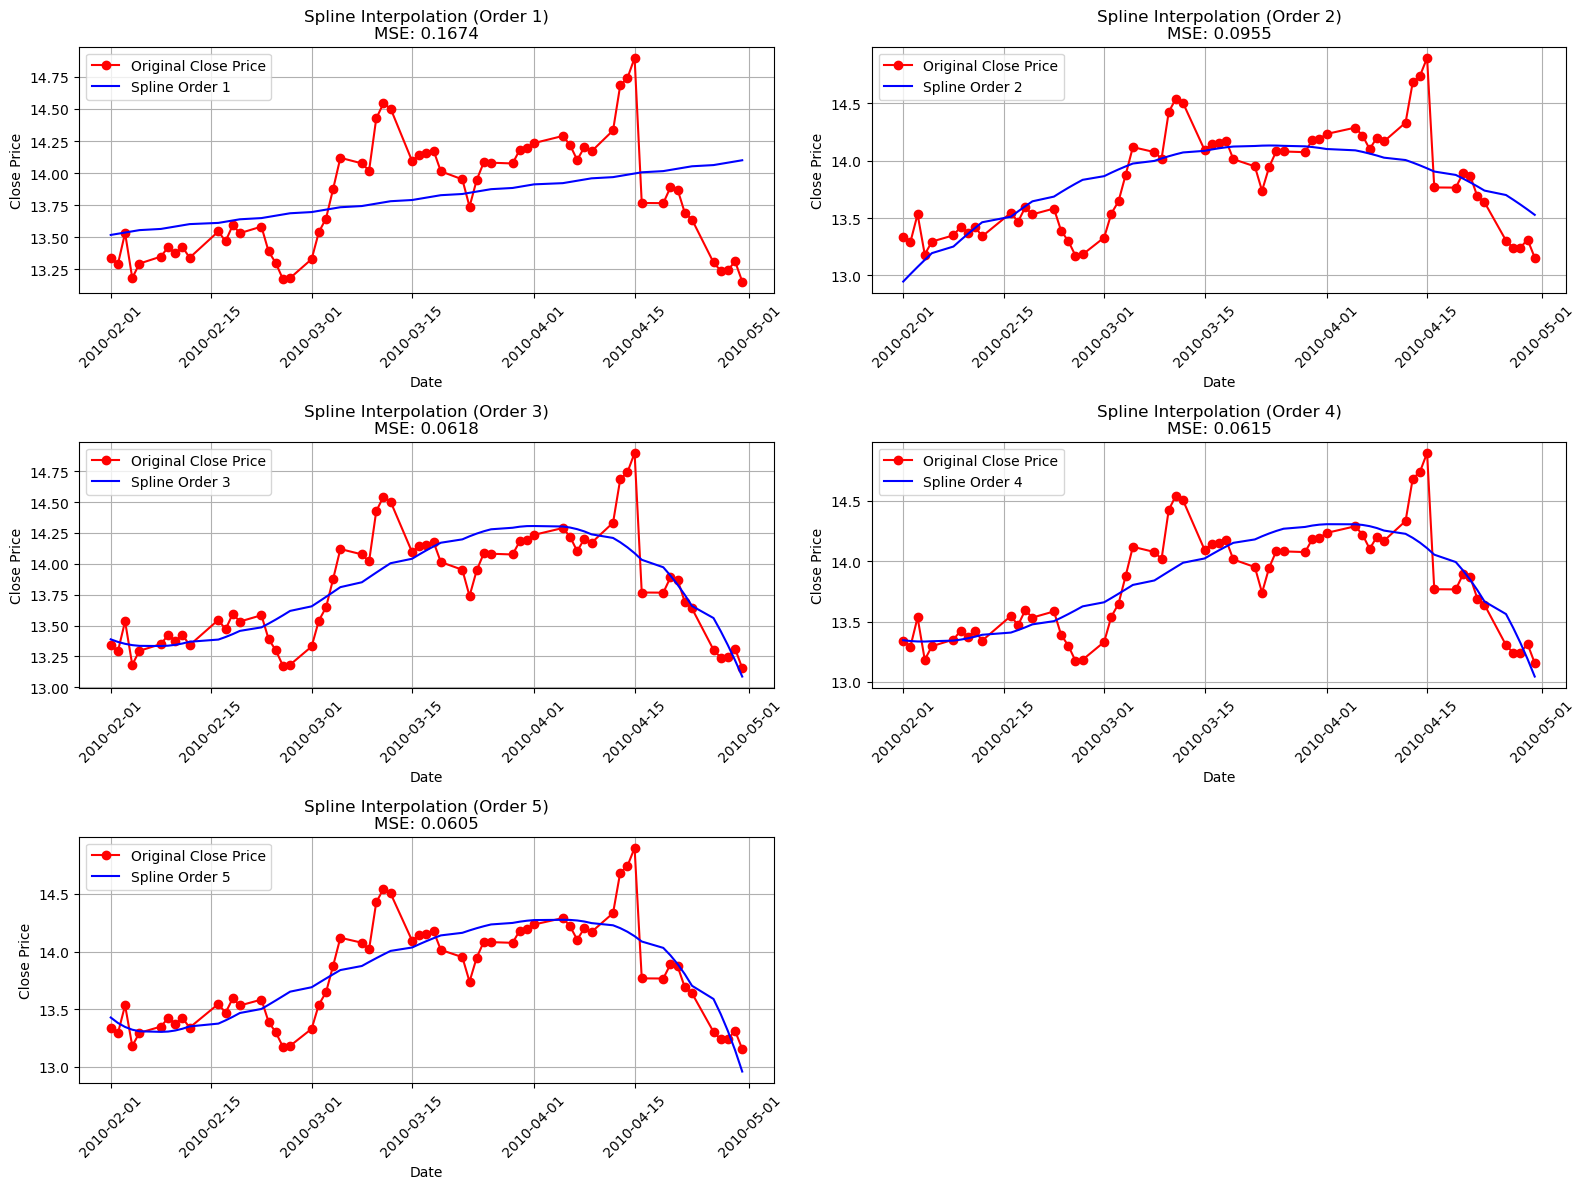

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline, CubicSpline

## Points to remember -> UnivariateSpline is used for creating a spline that fits a set of data points in one dimension.
## Similarly for -> CubicSpline is specifically designed for creating cubic spline interpolations.

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")

# Convert 'Date' to datetime
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for 2010
google_training_complete_2010 = google_training_complete[google_training_complete['Date'].dt.year == 2010]

# Filter for months 2 (February) to 4 (April)
google_training_complete_feb_apr = google_training_complete_2010[
    (google_training_complete_2010['Date'].dt.month >= 2) &
    (google_training_complete_2010['Date'].dt.month <= 4)
]

# Store the original close prices for plotting
original_close_prices = google_training_complete_feb_apr['Close'].copy()

# Create numerical indices for the dates
x = np.arange(len(google_training_complete_feb_apr['Date']))
y = original_close_prices

# Use only valid data points for interpolation
valid_indices = np.where(~np.isnan(y))[0]
x_valid = x[valid_indices]
y_valid = y.dropna().values

# Set up the plot
plt.figure(figsize=(16, 12))  # Increase figure size for better clarity

# Loop through orders from 1 to 5
"""
To create splines of different orders (e.g., quadratic, cubic, quartic, quintic, etc.) using UnivariateSpline, 
you can specify the degree of the spline using the k parameter. The k parameter determines the order of the spline, where:

k=1 corresponds to linear splines (first-order).
k=2 corresponds to quadratic splines (second-order).
k=3 corresponds to cubic splines (third-order, the default).
k=4 corresponds to quartic splines (fourth-order).
k=5 corresponds to quintic splines (fifth-order).
k=6 corresponds to sixth-order splines.
"""
for order in range(1, 6):
    # Spline interpolation of current order
    spline = UnivariateSpline(x_valid, y_valid, k=order)
    spline_interpolated = spline(x)
    
    # Calculate Mean Squared Error (MSE)
    mse = np.mean((y - spline_interpolated)**2)
    
    # Create a subplot for each order
    plt.subplot(3, 2, order)  # 3 rows, 2 columns of subplots
    plt.plot(google_training_complete_feb_apr['Date'][original_close_prices.notna()], 
             original_close_prices.dropna(), 
             marker='o', label='Original Close Price', color='r')
    plt.plot(google_training_complete_feb_apr['Date'], 
             spline_interpolated, 
             label=f'Spline Order {order}', color='b')
    
    plt.title(f'Spline Interpolation (Order {order})\nMSE: {mse:.4f}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


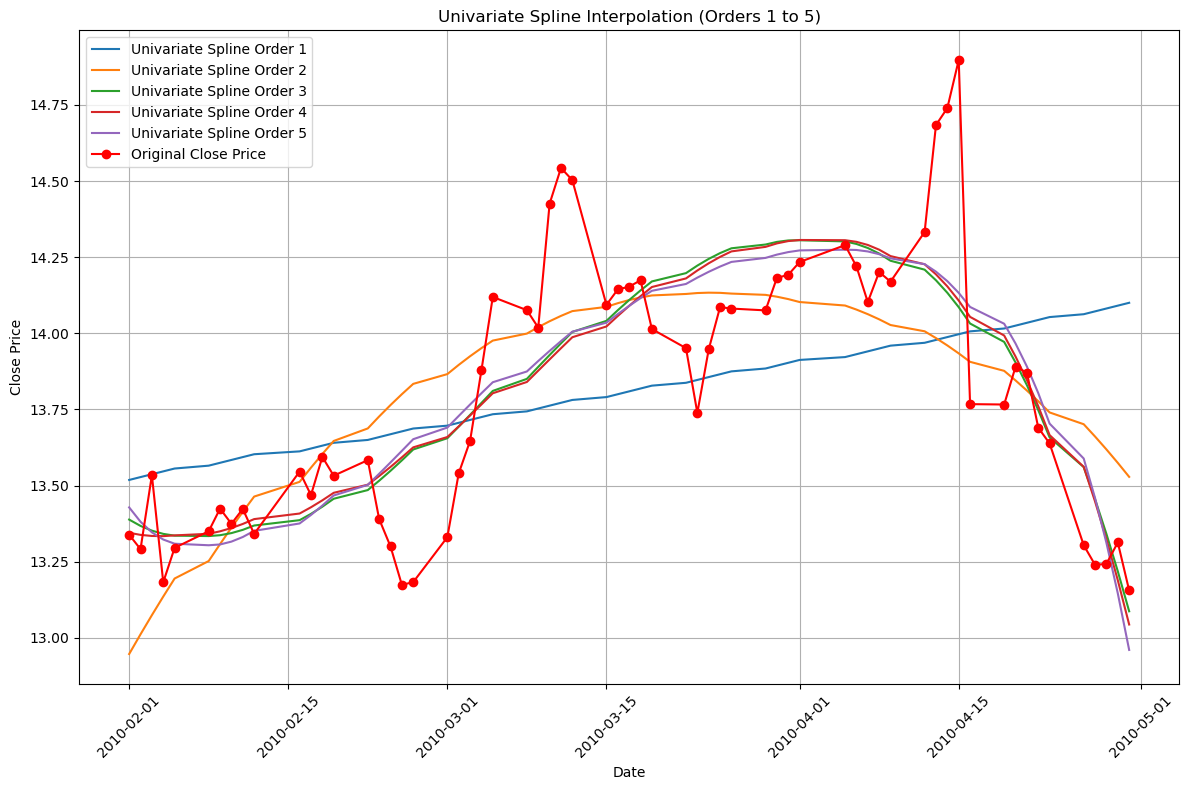

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")

# Convert 'Date' to datetime
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for 2010
google_training_complete_2010 = google_training_complete[google_training_complete['Date'].dt.year == 2010]

# Filter for months 2 (February) to 4 (April)
google_training_complete_feb_apr = google_training_complete_2010[
    (google_training_complete_2010['Date'].dt.month >= 2) &
    (google_training_complete_2010['Date'].dt.month <= 4)
]

# Store the original close prices for plotting
original_close_prices = google_training_complete_feb_apr['Close'].copy()

# Create numerical indices for the dates
x = np.arange(len(google_training_complete_feb_apr['Date']))
y = original_close_prices

# Use only valid data points for interpolation
valid_indices = np.where(~np.isnan(y))[0]
x_valid = x[valid_indices]
y_valid = y.dropna().values

# Set up the plot
plt.figure(figsize=(12, 8))  # Adjust figure size for clarity

# Loop through orders from 1 to 5 for Univariate Spline
for order in range(1, 6):
    # Univariate Spline interpolation
    univariate_spline = UnivariateSpline(x_valid, y_valid, k=order)
    univariate_interpolated = univariate_spline(x)
    
    # Plot the interpolated spline
    plt.plot(google_training_complete_feb_apr['Date'], 
             univariate_interpolated, 
             label=f'Univariate Spline Order {order}')
    
# Plot original close prices
plt.plot(google_training_complete_feb_apr['Date'][original_close_prices.notna()], 
         original_close_prices.dropna(), 
         marker='o', label='Original Close Price', color='r')

# Title and labels
plt.title('Univariate Spline Interpolation (Orders 1 to 5)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## Over Full data

In [6]:
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])
google_training_complete.set_index('Date', inplace=True)
google_training_complete

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028
...,...,...,...,...,...,...
2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000
2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300
2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200


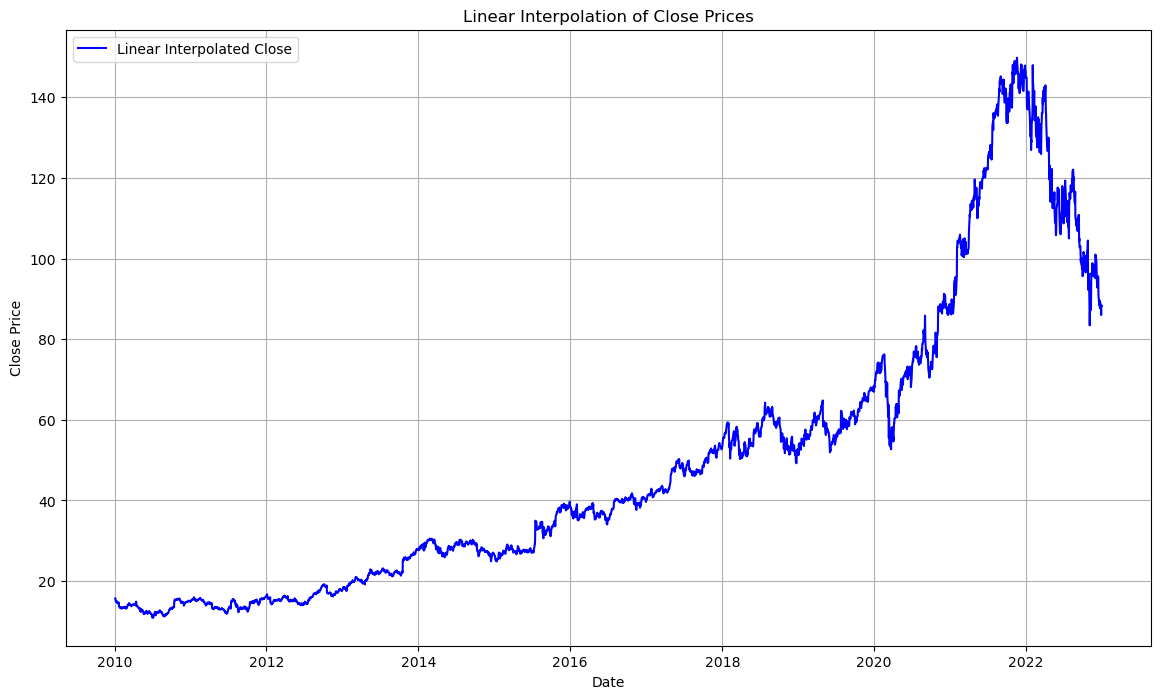

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset for training the models.
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")

# Ensure 'Date' is in datetime format if it isn't already
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Set date as index
google_training_complete.set_index('Date', inplace=True)

# Linear Interpolation
google_training_complete['Close_Linear'] = google_training_complete['Close'].interpolate(method='linear')

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(google_training_complete.index, google_training_complete['Close_Linear'], label='Linear Interpolated Close', color='blue')
plt.title('Linear Interpolation of Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

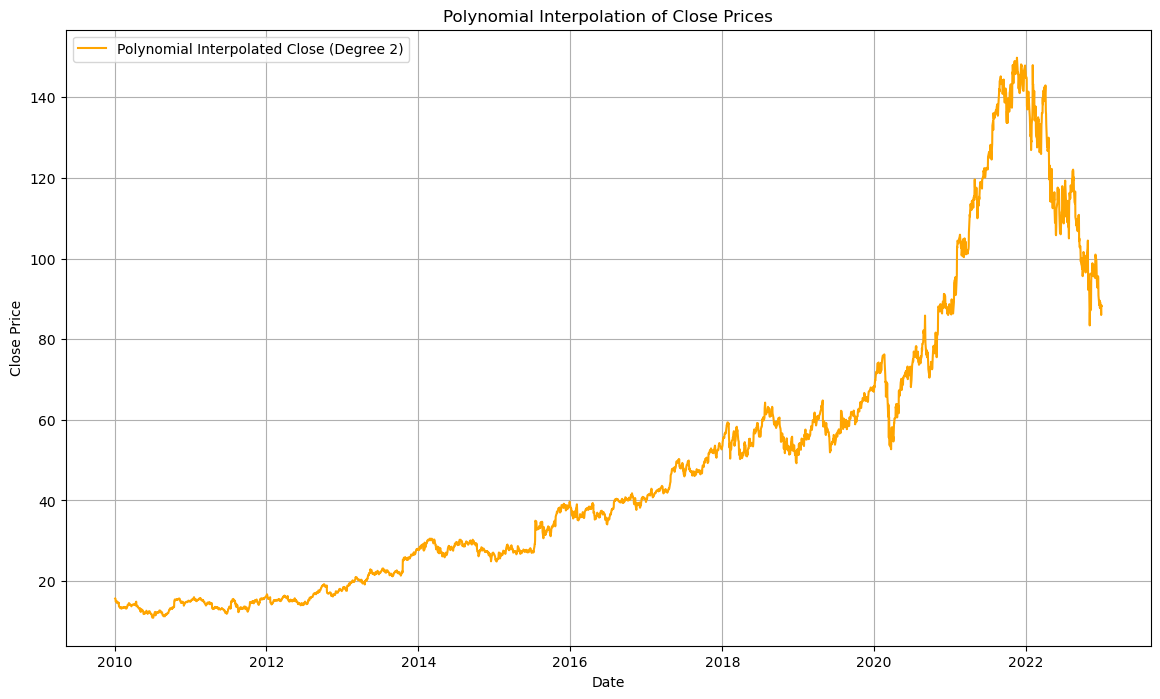

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset for training the models.
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")

# Ensure 'Date' is in datetime format if it isn't already
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Set date as index
google_training_complete.set_index('Date', inplace=True)

# Polynomial Interpolation (degree 2)
google_training_complete['Close_Polynomial'] = google_training_complete['Close'].interpolate(method='polynomial', order = 2)

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(google_training_complete.index, google_training_complete['Close_Polynomial'], label='Polynomial Interpolated Close (Degree 2)', color='orange')
plt.title('Polynomial Interpolation of Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

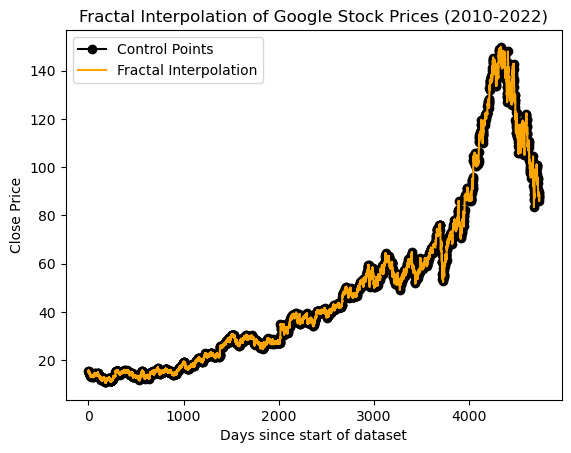

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Extract control points: Use Date and Close price
control_points = google_training_complete[['Date', 'Close']].copy()
control_points['Date'] = (control_points['Date'] - control_points['Date'].min()).dt.days  # Convert to numerical days

# Convert to numpy array
control_points = control_points.to_numpy()

def fractal_interpolation(control_points, iterations):
    points = np.array(control_points)
    
    for _ in range(iterations):
        new_points = []
        for i in range(len(points) - 1):
            p0 = points[i]
            p1 = points[i + 1]
            
            new_points.append(p0)
            midpoint = (p0 + p1) / 2 + np.random.normal(0, 0.1, size=p0.shape)
            new_points.append(midpoint)
        
        new_points.append(points[-1])
        points = np.array(new_points)
    
    return points

# Perform fractal interpolation
iterations = 5
interpolated_points = fractal_interpolation(control_points, iterations)

# Plotting
plt.plot(control_points[:, 0], control_points[:, 1], 'ko-', label='Control Points')  # Black solid line for control points
plt.plot(interpolated_points[:, 0], interpolated_points[:, 1], 'orange', linestyle='-', label='Fractal Interpolation')  # Orange dotted line for interpolation
plt.xlabel('Days since start of dataset')
plt.ylabel('Close Price')
plt.title('Fractal Interpolation of Google Stock Prices (2010-2022)')
plt.legend()
plt.show()